In [21]:
# just wannt test out plotting ticker, orderbook, and ohlcv data
import ccxt
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kc = ccxt.kucoin()
kc.load_markets()

BTC = "BTC/USDT"
ticker_data = kc.fetch_ticker(BTC)
orderbook_data = kc.fetch_order_book(BTC)
ohlcv_data = kc.fetch_ohlcv(BTC)

In [11]:
td = ticker_data.copy()
td.pop("info")
# create a df with a single row with the ticker data (except for info
# and timestamp
ticker_df = pd.DataFrame.from_dict([td])
# ticker_df = ticker_df.T
ticker_df

,symbol,timestamp,datetime,high,low,bid,bidVolume,ask,askVolume,vwap,open,close,last,previousClose,change,percentage,average,baseVolume,quoteVolume
0,BTC/USDT,1690333514195,2023-07-26T01:05:14.195Z,29372.7,29050.5,29172.4,None,29172.5,None,29198.742678,29102.3,29172.5,29172.5,None,70.2,0.24,None,1598.175671,4.666472e+07


In [35]:
# plot the orderbook data
ob_bids = orderbook_data['bids'][:10]
ob_asks = orderbook_data['asks'][:10]

In [36]:
bids_df = pd.DataFrame(ob_bids, columns=['price', 'volume'])
bids_df["side"] = "bids"
asks_df = pd.DataFrame(ob_asks, columns=['price', 'volume'])
asks_df["side"] = "asks"

orderbook_df = pd.concat([bids_df, asks_df])
orderbook_df

,price,volume,side
0,29172.4,0.002837,bids
1,29172.3,0.002837,bids
2,29172.2,0.002837,bids
3,29172.0,0.005675,bids
4,29171.6,0.011349,bids
5,29170.8,0.022699,bids
6,29169.7,0.001216,bids
7,29169.2,0.045397,bids
8,29169.0,0.205725,bids
9,29168.1,0.018525,bids


<Axes: title={'center': 'Orderbook'}, xlabel='price', ylabel='Count'>

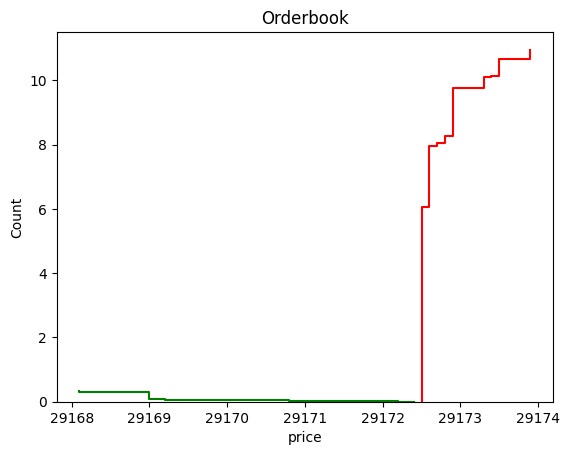

In [39]:
fig, ax = plt.subplots()
ax.set_title("Orderbook")
sns.ecdfplot(x="price", weights="volume", stat="count",
             complementary=True, data=orderbook_df.query("side=='bids'"), 
             ax=ax, color="green")
sns.ecdfplot(x="price", weights="volume", stat="count",
             data=orderbook_df.query("side=='asks'"),
                ax=ax, color="red")


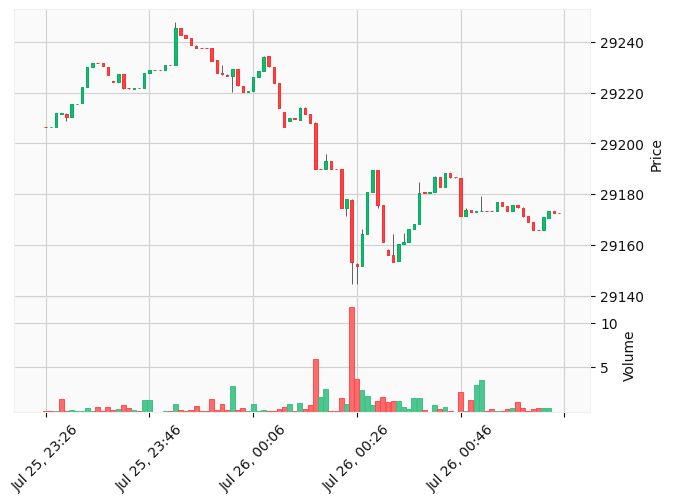

In [44]:
# display the ohlcv data
ohlcv_df = pd.DataFrame(ohlcv_data, columns=['time', 'open', 'high', 'low', 'close', 'volume'])
ohlcv_df['time'] = pd.to_datetime(ohlcv_df['time'], unit='ms')
ohlcv_df = ohlcv_df.set_index('time')

# plot the ohlcv data using mplfinance
fig2, ax2 = mpf.plot(ohlcv_df, type='candle', volume=True, style='yahoo', returnfig=True)